# Python for Heliophysics

Today we'll briefly cover a few data structures I didn't get to last time, and then look at functionality from [Astropy](https://docs.astropy.org/en/stable/), [PlasmaPy](https://docs.plasmapy.org/en/stable/), and finally [SunPy](https://docs.sunpy.org/en/stable/).  The intention of this tutorial is not to be comprehensive, but rather to give a general idea of the capabilities of the different packages.  The [Python in Heliophysics Community (PyHC)](http://heliopython.org) is an effort to coordinate the development of multiple Python packages for heliophysics.   

## Preliminary imports

Please run the following cell with shift-enter which will import what we need for today.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=Warning)

# General packages

import numpy as np
import matplotlib.pyplot as plt

# Settings for plotting

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

# Astropy imports

import astropy.units as u
import astropy.constants as const
from astropy.time import Time
from astropy.coordinates import get_body_barycentric, SkyCoord

# PlasmaPy imports

from plasmapy.atomic import Particle

# SunPy imports

import sunpy.map
from sunpy.net import Fido, attrs
from sunpy import timeseries
from sunpy.coordinates import frames
from sunpy.coordinates import get_body_heliographic_stonyhurst

In [2]:
import sunpy.map
from sunpy.net import Fido, attrs
from sunpy import timeseries

In [3]:
# GOES/XRS X-ray curve of the Sun 

goes_time_interval = attrs.Time(
    '2013-10-28 00:00',
    '2013-10-28 12:00',
)

goes = attrs.Instrument('XRS')

search_results = Fido.search(goes_time_interval, goes)

In [4]:
goes_files = Fido.fetch(search_results[0])

In [5]:
goes_lc = timeseries.TimeSeries(goes_files)

In [6]:
type(goes_lc)

sunpy.timeseries.sources.goes.XRSTimeSeries

/srv/conda/envs/notebook/lib/python3.8/asyncio/selector_events.py:694: ResourceWarning: unclosed transport <_SelectorSocketTransport fd=48 read=idle write=<idle, bufsize=0>>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)


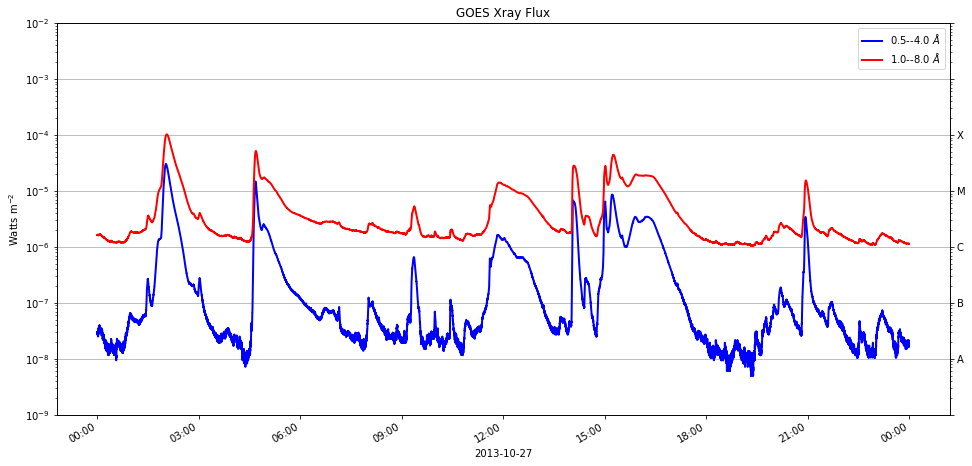

In [7]:
goes_lc.peek()

In [8]:
goes_lc.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2013-10-27 23:59:58.311999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2013-10-28 23:59:56.468999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 02/11/2013                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


In [9]:
goes_lc.units

OrderedDict([('xrsa', Unit("W / m2")), ('xrsb', Unit("W / m2"))])

In [10]:
stereo = (
    attrs.vso.Source('STEREO_A') &
    attrs.Instrument('EUVI') &
    attrs.Time('2010-08-19', '2010-08-19T00:10:00')  # midnight in UTC to 10 past midnight
)

In [11]:
aia = (
    attrs.Instrument('AIA') &
    attrs.vso.Sample(24 * u.hour) &
    attrs.Time('2010-08-19', '2010-08-19T00:10:00')
)

In [12]:
wavelength_range = attrs.Wavelength(17 * u.nm, 18 * u.nm)

In [13]:
res = Fido.search(wavelength_range, aia | stereo)

/srv/conda/envs/notebook/lib/python3.8/site-packages/sunpy/net/vso/attrs.py:164: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if not (isinstance(self.start, collections.Hashable) and


In [14]:
files = Fido.fetch(res)

/srv/conda/envs/notebook/lib/python3.8/site-packages/parfive/downloader.py:100: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  self.http_queue = asyncio.Queue(loop=self.loop)
/srv/conda/envs/notebook/lib/python3.8/asyncio/queues.py:48: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  self._finished = locks.Event(loop=loop)
/srv/conda/envs/notebook/lib/python3.8/site-packages/parfive/downloader.py:101: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  self.http_tokens = asyncio.Queue(maxsize=self.max_conn, loop=self.loop)
/srv/conda/envs/notebook/lib/python3.8/asyncio/queues.py:48: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  self._finished = locks.Event(loop=loop)
/srv/conda/envs/notebook/lib/python3.8/site-packages/parfive/d

/srv/conda/envs/notebook/lib/python3.8/site-packages/parfive/downloader.py:312: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  done, _ = await asyncio.wait(futures, loop=self.loop)
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/locks.py:21: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  self._event = asyncio.Event(loop=loop)
/srv/conda/envs/notebook/lib/python3.8/si

/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(
/srv/conda/envs/notebook/lib/pyt

/srv/conda/envs/notebook/lib/python3.8/site-packages/aiohttp/connector.py:964: DeprecationWarning: The loop argument is deprecated since Python 3.8, and scheduled for removal in Python 3.10.
  hosts = await asyncio.shield(self._resolve_host(


In [17]:
map_stereo, map_aia = sunpy.map.Map(sorted(files))

In [18]:
type(map_aia)

sunpy.map.sources.sdo.AIAMap

In [19]:
type(map_stereo)

sunpy.map.sources.stereo.EUVIMap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


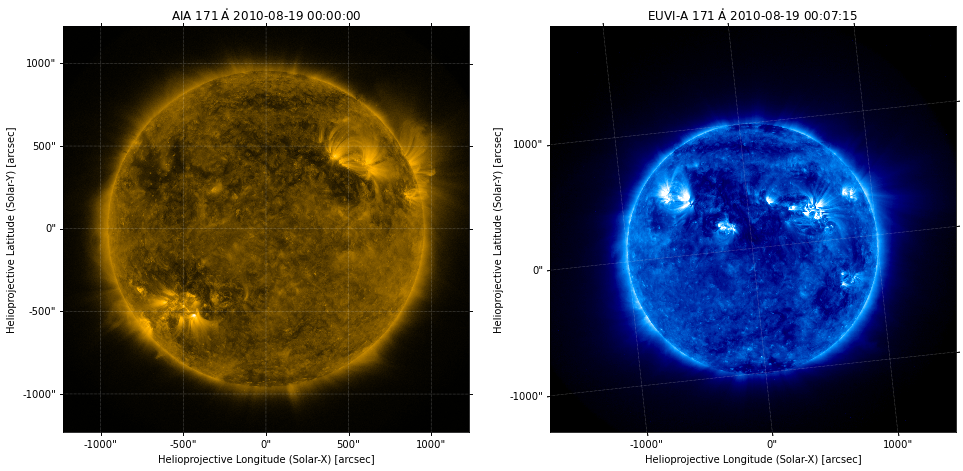

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection = map_aia)
map_aia.plot(axes=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection = map_stereo)
map_stereo.plot(axes=ax2)

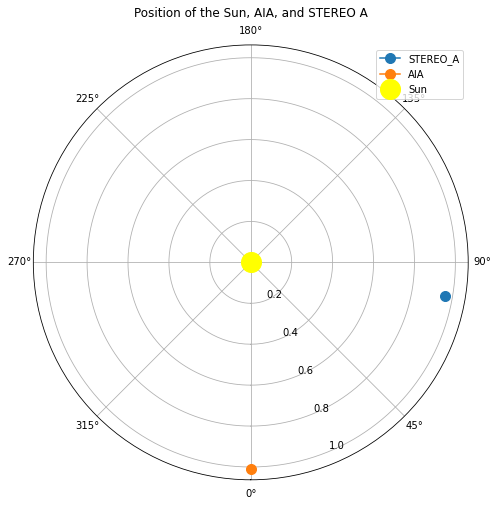

In [21]:
ax = plt.subplot(projection='polar')

plt.polar(
    map_stereo.observer_coordinate.lon.to(u.rad),
    map_stereo.observer_coordinate.radius.to(u.AU),
    marker='o',
    ms=10,
    label='STEREO_A',
)

plt.polar(
    map_aia.observer_coordinate.lon.to(u.rad),
    map_aia.observer_coordinate.radius.to(u.AU),
    marker='o',
    ms=10,
    label='AIA',
)

plt.polar(
    0 * u.rad,
    0 * u.AU,
    'o',
    ms=20,
    label='Sun',
    color='yellow',
)

ax.set_theta_zero_location("S")

plt.title('Position of the Sun, AIA, and STEREO A')
plt.legend()